In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

In [ ]:
diabetes = pd.read_csv('/content/diabetes.csv')
diabetes.shape

(768, 9)

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
y = diabetes['Outcome']
x = diabetes.drop(['Outcome'], axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2022)

print(x_train.shape, x_test.shape)

(614, 8) (154, 8)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
y_train = y_train.values

# 모델

In [ ]:
def build_model():
  model = keras.Sequential([
      layers.Dense(units=64, activation='relu', input_shape=(8,)),
      layers.Dense(units=32, activation='relu'),
      layers.Dense(units=8, activation='relu'),
      layers.Dense(units=1, activation='sigmoid') # sigmoid를 적으면 분류 모델이 된다,
      # 다중 분류일때는 softmax가 되고, 2진분류일때는 마지막층이 sigmoid가 된다.
  ])

  loss = tf.keras.losses.BinaryCrossentropy()
  adam = tf.keras.optimizers.Adam(learning_rate = 0.002)

  model.compile(
    optimizer=adam,
    loss=loss, # 2진분류일때는 binary_crossentropy 다중분류일때는 categorical_crossentropy 
    metrics=['accuracy']
  )
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                576       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 8)                 264       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2,929
Trainable params: 2,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 100
BATCH_SIZE = 32 # batch_size를 정해주지않으면 디폴트값은 32이다. 제일 잘 학습하는 값이 32

history = model.fit(x_train_s, y_train,
                    epochs=EPOCHS,
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/100
16/16 [==============================] - 1s 13ms/step - loss: 0.6495 - accuracy: 0.6640 - val_loss: 0.5743 - val_accuracy: 0.7642
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5444 - accuracy: 0.7780 - val_loss: 0.4869 - val_accuracy: 0.7724
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4807 - accuracy: 0.7821 - val_loss: 0.4554 - val_accuracy: 0.7805
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4587 - accuracy: 0.7862 - val_loss: 0.4560 - val_accuracy: 0.7805
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4461 - accuracy: 0.7923 - val_loss: 0.4586 - val_accuracy: 0.7642
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.7902 - val_loss: 0.4622 - val_accuracy: 0.7642
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.8004 - val_loss: 0.4567 - val_accuracy: 0.7642
Epoch 8/100


In [ ]:
# 학습곡선

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

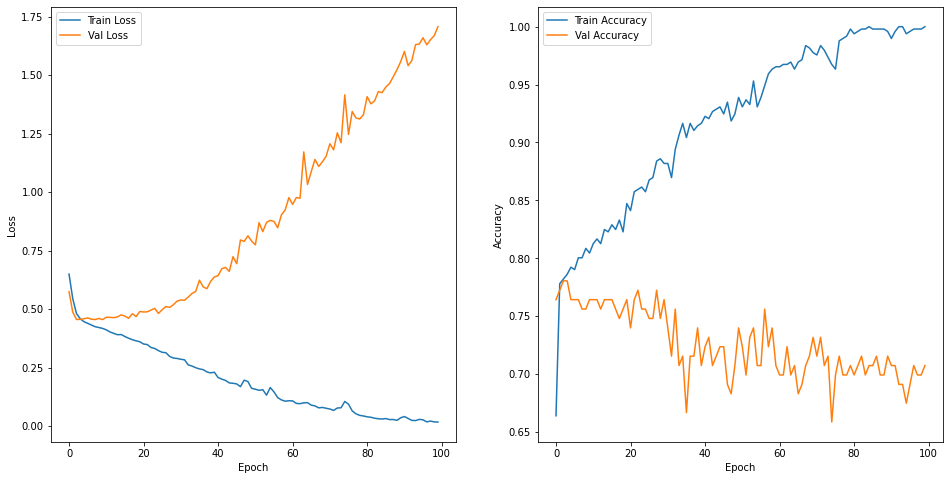

In [ ]:
plot_history(history)

In [ ]:
x_test_s = scaler.transform(x_test)
y_test = y_test.values

model.evaluate(x_test_s, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 1.6223 - accuracy: 0.7078


[1.6223112344741821, 0.7077922224998474]

In [ ]:
## 결과 시각화 ConfusionMatrix

y_pred = model.predict(x_test_s)

5/5 [==============================] - 0s 3ms/step


In [ ]:
y_pred = y_pred.flatten()

In [ ]:
y_pred = (y_pred > 0.5).astype('int')
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1])

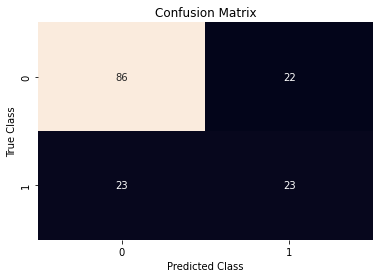

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cfm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cfm, annot = True, cbar = False)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)